In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

plt.rc('font' ,family='Microsoft JhengHei')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 資料來源：臺北市資料大平臺-臺北捷運各站分時進出量統計
# https://data.taipei/dataset/detail?id=63f31c7e-7fc3-418b-bd82-b95158755b4d
# 使用資料：臺北捷運每日分時各站OD流量統計資料_202406
df = pd.read_csv('臺北捷運每日分時各站OD流量統計資料_202406.csv')
df #　8096760 rows × 5 columns

,日期,時段,進站,出站,人次
0,2024-06-01,0,松山機場,松山機場,0
1,2024-06-01,0,松山機場,中山國中,0
2,2024-06-01,0,松山機場,南京復興,0
3,2024-06-01,0,松山機場,忠孝復興,0
4,2024-06-01,0,松山機場,大安,0
...,...,...,...,...,...
8096755,2024-06-30,23,新北產業園區,徐匯中學,0
8096756,2024-06-30,23,新北產業園區,三和國中,0
8096757,2024-06-30,23,新北產業園區,三重國小,0
8096758,2024-06-30,23,新北產業園區,迴龍,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096760 entries, 0 to 8096759
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   日期      object
 1   時段      int64 
 2   進站      object
 3   出站      object
 4   人次      int64 
dtypes: int64(2), object(3)
memory usage: 308.9+ MB


In [4]:
df.describe(include='all')

,日期,時段,進站,出站,人次
count,8096760,8.096760e+06,8096760,8096760,8.096760e+06
unique,30,NaN,119,108,NaN
top,2024-06-01,NaN,松山機場,松山機場,NaN
freq,269892,NaN,68040,74970,NaN
mean,NaN,1.271429e+01,NaN,NaN,7.250754e+00
std,NaN,6.547576e+00,NaN,NaN,2.128490e+01
min,NaN,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,8.000000e+00,NaN,NaN,0.000000e+00
50%,NaN,1.300000e+01,NaN,NaN,1.000000e+00
75%,NaN,1.800000e+01,NaN,NaN,6.000000e+00


In [5]:
missing_values = df.isnull().sum()
# 顯示哪些欄位有缺失值
print("Missing values per column:")
print(missing_values)

# 顯示有缺失值的欄位和它們的缺失值數量
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)


Missing values per column:
日期    0
時段    0
進站    0
出站    0
人次    0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


In [6]:
# 欄位名稱轉換
df.columns = ['Date', 'Time', 'Entry', 'Exit', 'People']
df = df[df['People'] != 'Null']

# 資料型態轉換
df["People"] = pd.to_numeric(df["People"], downcast='integer')
df["Entry"] = df["Entry"].astype('category')
df["Exit"] = df["Exit"].astype('category')

# 新增欄位進出站
df['From_to'] = df['Entry'].str.cat(df['Exit'], sep='_')

# 欄位轉換和新增欄位
df['Date'] = pd.to_datetime(df['Date'] ,errors='coerce')
df['Weekday'] = df['Date'].dt.weekday # 0:星期一, 1:星期二, 2:星期三, 3:星期四, 4:星期五, 5:星期六, 6:星期日
df["Weekday"] = pd.to_numeric(df["Weekday"], downcast='integer') 
df['Weeknum'] = df['Date'].dt.isocalendar().week
df["Weeknum"] = pd.to_numeric(df["Weeknum"], downcast='integer')
df.head()

,Date,Time,Entry,Exit,People,From_to,Weekday,Weeknum
0,2024-06-01,0,松山機場,松山機場,0,松山機場_松山機場,5,22
1,2024-06-01,0,松山機場,中山國中,0,松山機場_中山國中,5,22
2,2024-06-01,0,松山機場,南京復興,0,松山機場_南京復興,5,22
3,2024-06-01,0,松山機場,忠孝復興,0,松山機場_忠孝復興,5,22
4,2024-06-01,0,松山機場,大安,0,松山機場_大安,5,22


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096760 entries, 0 to 8096759
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Date     datetime64[ns]
 1   Time     int64         
 2   Entry    category      
 3   Exit     category      
 4   People   int16         
 5   From_to  object        
 6   Weekday  int8          
 7   Weeknum  Int8          
dtypes: Int8(1), category(2), datetime64[ns](1), int16(1), int64(1), int8(1), object(1)
memory usage: 239.4+ MB


In [8]:
# 列出唯一值
print(df['Entry'].unique())
print(df['Exit'].unique())
print(df['Weekday'].unique())
print(df['Time'].unique())   

['松山機場', '中山國中', '南京復興', '忠孝復興', '大安', ..., '板新', 'Y板橋', '新埔民生', '幸福', '新北產業園區']
Length: 119
Categories (119, object): ['BL板橋', 'Y板橋', '七張', '三和國中', ..., '頂溪', '頭前庄', '麟光', '龍山寺']
['松山機場', '中山國中', '南京復興', '忠孝復興', '大安', ..., '徐匯中學', '三和國中', '三重國小', '迴龍', '丹鳳']
Length: 108
Categories (108, object): ['BL板橋', 'G大坪林', 'O景安', 'O頭前庄', ..., '頂埔', '頂溪', '麟光', '龍山寺']
[5 6 0 1 2 3 4]
[ 0  1  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [9]:
# 轉換為樞紐分析表（Pivot Table）
def df_to_pivot(df):
    pv = df.pivot_table(index=['Date', 'From_to'], columns='Time', values='People')
    return pv

#　進出站分時人數
def weekday_series(df, weekday, station, output, by_thousand):
    # 進出站判斷
    if output == 'in':
        df_weekday = df[(df['Weekday'] == weekday) & (df['Entry'] == station)].copy() 
    elif output == 'out':
        df_weekday = df[(df['Weekday'] == weekday) & (df['Exit'] == station)].copy()
    
    # 進出站人數
    pv_weekday = df_to_pivot(df_weekday).dropna()
    weekday_count = len(pv_weekday.index.get_level_values(0).unique())
    
    # 以千人為單位
    if by_thousand:
        result_weekday = round(pv_weekday.sum(numeric_only=True) / weekday_count / 1000, 1)
    else:
        result_weekday = pv_weekday.sum(numeric_only=True) / weekday_count

    return result_weekday

#　一週內的平均人數
def station_sum_up(df, station, output, by_thousand):
    sys.stdout.write('\rprocessing {}, output format: {}'.format(station, output))
    weekday_list = []
    # 星期一到星期日
    for i in range(7):
        series = weekday_series(df, i, station, output, by_thousand)
        weekday_list.append(series)
    
    # 合併七天的資料
    result = pd.concat(weekday_list, axis=1).T
    result['Weekday'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    result = result.set_index('Weekday')
    
    return result

def get_df_max(df):
    max_value = 0
    for item in df.columns:
        if df[item].max() > max_value:
            max_value = df[item].max()
    return max_value

In [10]:
# 測試 weekday_series 函數
try:
    weekday_series_output = weekday_series(df, 0, '台北車站', 'in', True)
    print('weekday_series_output:' , weekday_series_output)
except Exception as e:
    print('Error:', e)

weekday_series_output: Time
0      1.3
1      0.0
5      0.0
6      1.3
7      5.3
8     11.2
9      7.9
10     6.4
11     6.5
12     6.8
13     7.3
14     7.0
15     7.3
16     8.1
17    11.0
18    13.0
19    10.0
20     8.0
21     8.0
22     7.7
23     2.8
dtype: float64


In [11]:
# 測試 station_sum_up 函數
try:
    print('station_sum_up:')
    station_sum_up_output = station_sum_up(df, '台北車站', 'in', True)
    print(station_sum_up_output)
except Exception as e:
    print("Error in station_sum_up:", e)

station_sum_up:
processing 台北車站, output format: inTime      0    1    5    6    7     8    9    10    11    12  ...    14    15  \
Weekday                                                       ...               
Mon      1.3  0.0  0.0  1.3  5.3  11.2  7.9  6.4   6.5   6.8  ...   7.0   7.3   
Tue      1.1  0.0  0.0  1.4  6.5  13.7  9.7  6.5   6.5   6.7  ...   6.5   6.6   
Wed      1.0  0.0  0.0  1.3  6.4  13.4  9.1  6.1   6.0   6.4  ...   6.4   6.6   
Thu      1.1  0.0  0.0  1.4  6.2  13.3  9.3  6.4   6.1   6.6  ...   6.6   6.7   
Fri      1.8  0.0  0.0  1.3  6.2  12.7  8.8  6.8   7.0   7.5  ...   8.3   8.3   
Sat      1.6  0.0  0.0  0.9  2.2   5.2  7.1  8.8  10.7  10.7  ...  10.6  10.7   
Sun      1.6  0.0  0.0  0.7  1.7   3.6  5.2  7.1   8.5   8.9  ...   9.2  10.1   

Time       16    17    18    19    20    21   22   23  
Weekday                                                
Mon       8.1  11.0  13.0  10.0   8.0   8.0  7.7  2.8  
Tue       7.0  10.6  13.8   9.9   6.9   7.0  7.1  2.

processing 台北車站, output format: in

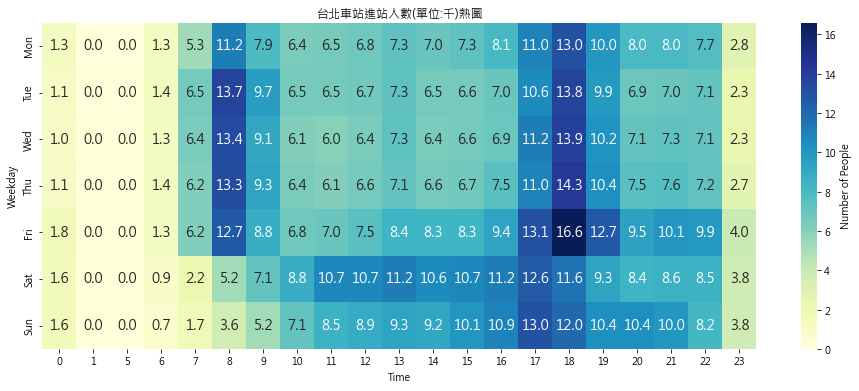

processing 中正紀念堂, output format: in

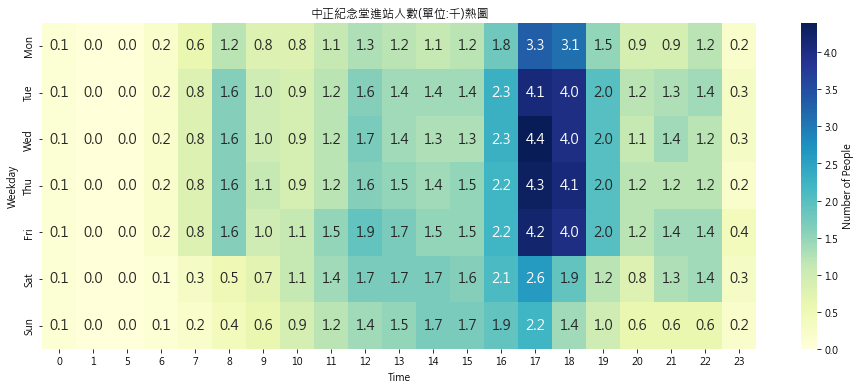

processing 中山, output format: in

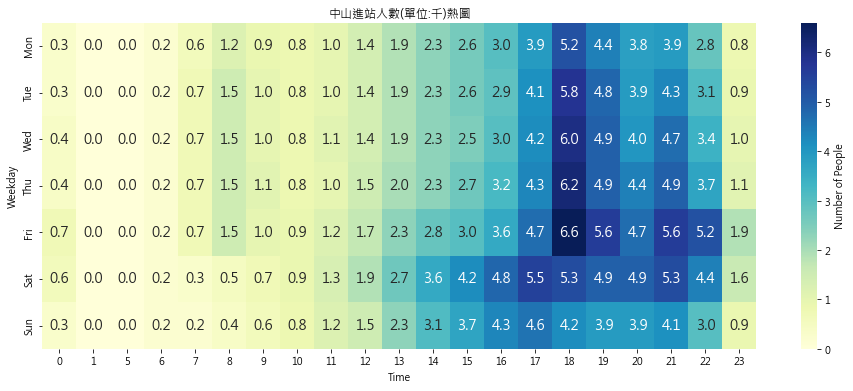

In [ ]:
# 車站名稱列表
stations = ['台北車站', '中正紀念堂', '中山']

for station in stations:
    # 使用 station_sum_up 函示計算車站的進站人數
    station_data = station_sum_up(df, station, 'in', True)
    
    # 繪製進站熱力圖
    plt.figure(figsize=(16, 6))
    sns.heatmap(station_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Number of People'} ,annot_kws={'size': 14})
    plt.title(f'{station}進站人數(單位:千)熱圖') 
    plt.ylabel('Weekday')
    plt.xlabel('Time')
    plt.show()

processing 台北車站, output format: out

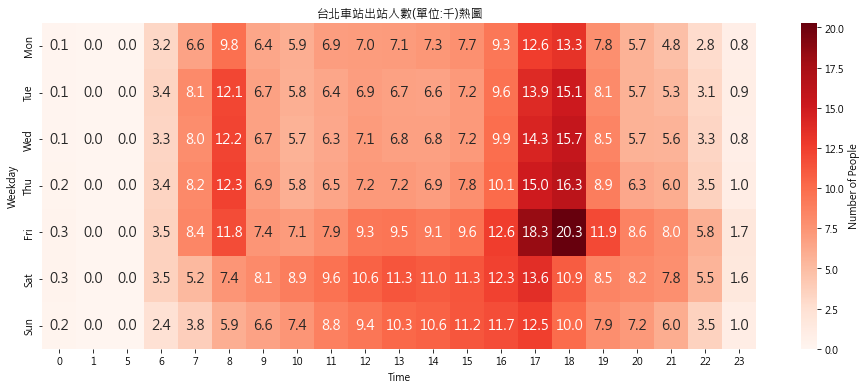

processing 中正紀念堂, output format: out

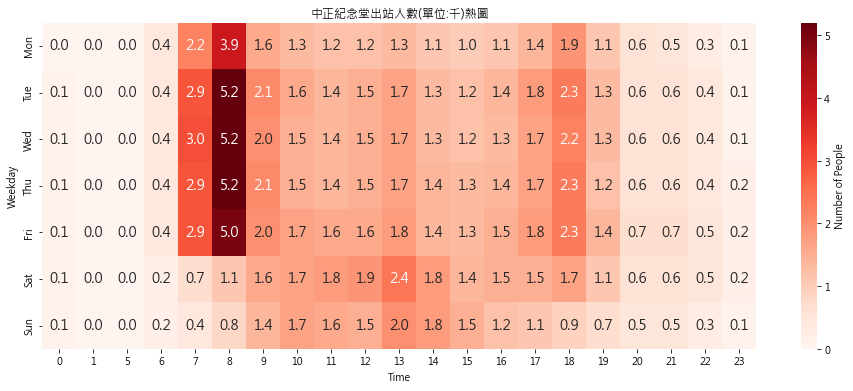

processing 中山, output format: out

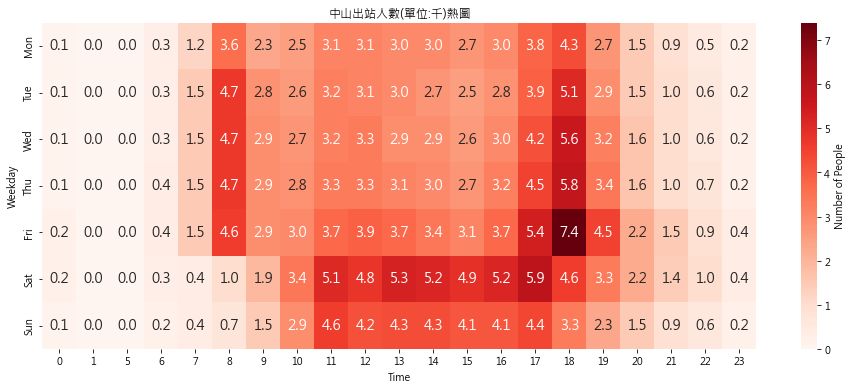

In [21]:
stations = ['台北車站', '中正紀念堂', '中山']

for station in stations:
    # 使用 station_sum_up 函示計算車站的進站人數
    station_data = station_sum_up(df, station, 'out', True)
    
    # 繪製出站熱力圖
    plt.figure(figsize=(16, 6))
    sns.heatmap(station_data, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Number of People'} ,annot_kws={'size': 14})
    plt.title(f'{station}出站人數(單位:千)熱圖') 
    plt.ylabel('Weekday')
    plt.xlabel('Time')
    plt.show()

以中正紀念堂站為例，分析人流高峰

* 平日
    * 進站人流，在 17:00 到 19:00 達到最高峰，對應到下班時段。
    * 出站人流，則是 7:00 到 9:00 達到最高峰，對應到上班時段，反映出工作日早晨的通勤需求。

* 假日
    * 進站，10:00 到 12:00
    * 出站，15:00 到 17:00
